In [2]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 3 - Whitening example with 2D data
#
# Author: Chanchal Chatterjee
#

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [4]:
# Number of samples N and dimension D
nSamples = 2000
nDim     = 10

In [5]:
# Generate the covX random matrices
cov = 3*np.array([ \
    [ 0.0910,  0.0380, -0.0530, -0.0050,  0.0100, -0.1360,  0.1550,  0.0300,  0.0020,  0.0320 ], \
    [ 0.0380,  0.3730,  0.0180, -0.0280, -0.0110, -0.3670,  0.1540, -0.0570, -0.0310, -0.0650 ], \
    [-0.0530,  0.0180,  1.4300,  0.0170,  0.0550, -0.4500, -0.0380, -0.2980, -0.0410, -0.0300 ], \
    [-0.0050, -0.0280,  0.0170,  0.0840, -0.0050,  0.0160,  0.0420, -0.0220,  0.0010,  0.0050 ], \
    [ 0.0100, -0.0110,  0.0550, -0.0050,  0.0710,  0.0880,  0.0580, -0.0690, -0.0080,  0.0030 ], \
    [-0.1360, -0.3670, -0.4500,  0.0160,  0.0880,  5.7200, -0.5440, -0.2480,  0.0050,  0.0950 ], \
    [ 0.1550,  0.1540, -0.0380,  0.0420,  0.0580, -0.5440,  2.7500, -0.3430, -0.0110, -0.1200 ], \
    [ 0.0300, -0.0570, -0.2980, -0.0220, -0.0690, -0.2480, -0.3430,  1.4500,  0.0780,  0.0280 ], \
    [ 0.0020, -0.0310, -0.0410,  0.0010, -0.0080,  0.0050, -0.0110,  0.0780,  0.0670,  0.0150 ], \
    [ 0.0320, -0.0650, -0.0300,  0.0050,  0.0030,  0.0950, -0.1200,  0.0280,  0.0150,  0.3410 ]])
cov.shape

(10, 10)

In [6]:
from scipy.linalg import eigh

eigvals, eigvecs = eigh(cov)
print("eigvals =\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
#np.random.seed(1)
R = np.random.normal(0, 1, (nDim, nSamples))
X = V @ D @ R
X.shape

eigvals =
 [17.69943711  8.3465813   5.12625925  3.0883194   1.18090213  0.88164691
  0.26140372  0.21349209  0.18194518  0.15101291]


(10, 2000)

In [7]:
# Inverse square root of the correlation matrix
from scipy.linalg import eigh

# Compute Correlation matrix and eigen vectors of the generated data
corX = (X @ X.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvals, eigvecs = eigh(corX)
print("eigvals =\n", eigvals[::-1])

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(1/eigvals[::-1]))
Ah = V @ D @ V.T
Ah.shape


eigvals =
 [17.53064373  8.42560942  5.57398849  3.04173742  1.16034373  0.88597336
  0.26324926  0.21730727  0.17844258  0.1597747 ]


(10, 10)

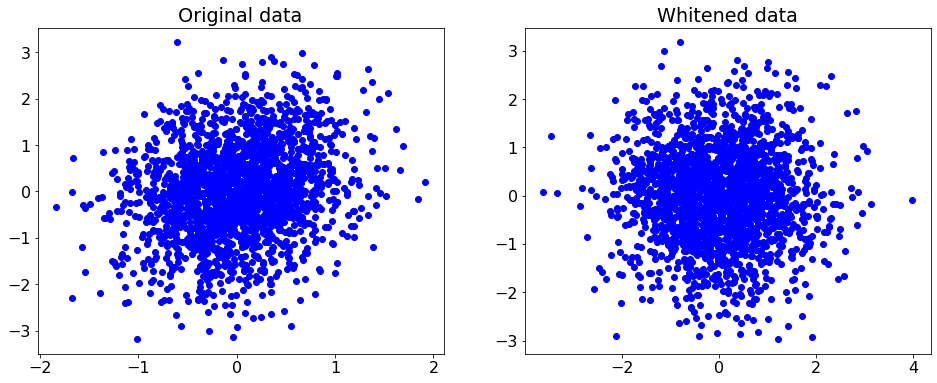

In [8]:
# Plot the Whitened data
Y = Ah @ X
plt.figure(figsize=(16, 6))
plt.rcParams.update({'font.size': 16})
plt.subplot(1, 2, 1)
plt.plot(X[0,:], X[9,:], 'bo')
plt.title("Original data")
plt.subplot(1, 2, 2)
plt.plot(Y[0,:], Y[9,:], 'bo')
plt.title("Whitened data")
plt.show()

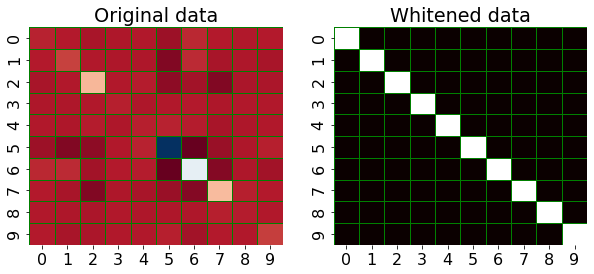

In [13]:
# Plot the EVD data
import seaborn as sns
Y = Ah @ X
corX = (X @ X.T)/nSamples
corY = (Y @ Y.T)/nSamples
plt.figure(figsize=(10, 4))
plt.rcParams.update({'font.size': 16})
plt.subplot(1, 2, 1)
#plt.imshow(corX, interpolation='nearest', cmap='RdBu')
sns.heatmap(corX, linewidth=0.5, linecolor="green", cmap='RdBu', cbar=False)
plt.title("Original data")
plt.subplot(1, 2, 2)
#plt.imshow(corY, interpolation='nearest', cmap='hot')
sns.heatmap(corY, linewidth=0.5, linecolor="green", cmap='hot', cbar=False)
plt.title("Whitened data")
plt.show()